In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
myfile = (r"C:\Users\KASHYAP\Desktop\segmentation_data.csv")
customer = pd.read_csv(myfile,index_col = 0)

In [3]:
customer.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
customer.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
customer.shape

(2000, 7)

In [6]:
#standardization
from sklearn.preprocessing import StandardScaler                                         

In [7]:
st = StandardScaler()
customer_std = pd.DataFrame(st.fit_transform(customer), columns = list(customer.columns))
customer_std.agg(['mean', 'std'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,3.554712e-15,5.950795e-16,1.180722e-16,-6.833423e-16,6.605827e-17,2.589706e-15,-4.455103e-15
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00


In [8]:
customer_std 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


In [9]:
customer_std.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [10]:
#applying K-Means
from sklearn.cluster import KMeans

In [11]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(customer_std)
    wcss.append(kmeans.inertia_)      

C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KASHYAP\anaconda3\lib\site-packages\skl

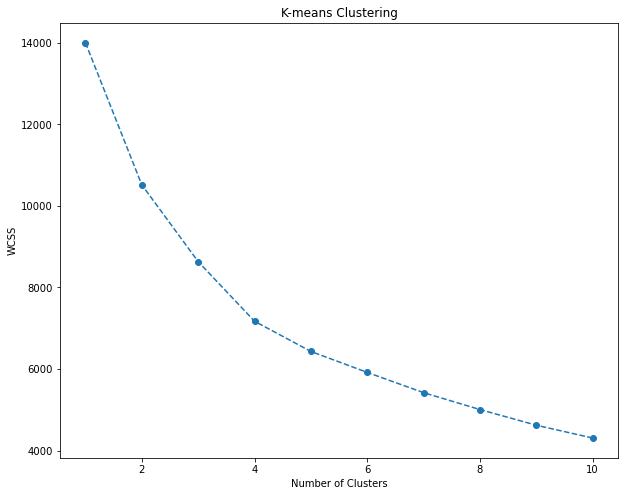

In [12]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
range_n_clusters = [2,3,4,5,6,7,8,9]
for k in range_n_clusters:
    kmeans = KMeans (n_clusters = k)
    kmeans.fit(customer_std)
    print (k, silhouette_score(customer_std, kmeans.labels_))

C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 0.24820106944568027


C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 0.27177060998494357


C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 0.26879180394522123


C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 0.2542404456602449


C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 0.25930998397460336


C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 0.266580535995774


C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 0.28334394369241356


C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 0.27667263253166846


In [15]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')

In [16]:
kmeans.fit(customer_std)

C:\Users\KASHYAP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [17]:
labels = kmeans.labels_
customer['cluster']=labels

In [18]:
labels

array([3, 2, 1, ..., 1, 2, 1])

In [19]:
customer.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,3
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,0
100000005,0,0,53,1,149031,1,1,0


In [20]:
customer['cluster'].value_counts()

2    705
0    570
1    461
3    264
Name: cluster, dtype: int64

In [21]:
#INTEcustomer.groupby(['cluster']).mean()

In [22]:
#INTERPRETATIONS:
#Cluster 0 - This cluster appears to be doing well on major aspects, especially on: education, income. 
#Hence, this cluster can be labelled as 'well-off'. 
#Cluster 1 - This cluster showcases values that represent a typical household. 
#Hence, this cluster can be labelled as 'standard'.
#Cluster 2 - This cluster is seen to be performing low in almost all aspects, especially on: income, occupation and settlement size.
#Hence, this cluster can be labelled as 'fewer opportunities'.
#Cluster 3 - This cluster seems to be the potential well-off cluster.
#Cluster 3 can be labelled as 'career focused'.

In [23]:
# Add the segment labels to our table
customer['Labels'] = customer['cluster'].map({0:'well-off', 
                                                                  1:'standard',
                                                                  2:'fewer opportunities', 
                                                                  3:'career focused'})

In [24]:
customer.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,3,career focused
100000002,1,1,22,1,150773,1,2,2,fewer opportunities
100000003,0,0,49,1,89210,0,0,1,standard
100000004,0,0,45,1,171565,1,1,0,well-off
100000005,0,0,53,1,149031,1,1,0,well-off
